# Final Project - Uber data 

Analysing Uber pickup data for New York City. The data includes uber pickup time, base, latitute and longitude for the months from April to September for the year 2014.

Analysis done :

  1.  Total number of uber rides per month
  2.  Total number of uber rides per weekday
  3.  How much percentage of uber rides does each hour of the day contribute to the entire day's rides. This is used to identify the frequency distribution of a single day's rides per hour
  4.  Scatter plot to signify how the frequency of rides changes (per hour) for each weekday. This is used to idenfity if the weekday plays any role in frequency distribution identified in above step
  5.  Heatmap animation showing how the location of uber rides changes as the day progresses on New York's map
  6.  Define pool size as the number of rides within 3kms of any given ride and ordered with +/- 2 mins gap. We then         go on to analyze how giving them an option of pooling could make sense

### Importing the required libraries to analyze the data. 

1) Imported csv as raw files are in csv format 
2) Imported pandas as analyzing in pandas dataframe
3) Imported geopy for analyzing the latitude and longitude informations, calculating the distance between 2 points
4) Imported datetime for date manipulations
5) Imported matplotlib,seaborn for graphs
6) Imported mpl_toolkits for plotting on a map

In [90]:
import csv
import pandas as pd
from geopy.distance import great_circle
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import calendar
import numpy as np
from mpl_toolkits.basemap import Basemap


Reading data from roaw csv and loading the same into dataframe. After which I am concatinating the dataframes into one single dataframe

In [2]:
dfApr2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')

In [3]:
dfMay2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-may14.csv')

In [4]:
dfJun2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')

In [5]:
dfJul2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')

In [6]:
dfAug2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')

In [7]:
dfSep2014 = pd.read_csv('/Users/shraavyasirpa/Desktop/Python/FinalProject/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')

In [8]:
df2014 = pd.concat([dfApr2014, dfMay2014, dfJun2014, dfJul2014, dfAug2014, dfSep2014])
df2014.head(5)

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

Checking whether the data is same in the concatenated dataframe and individual dataframes. We can observe that the number of the rows is same.

In [9]:
len(df2014)

4534327

In [10]:
len(dfApr2014) + len(dfMay2014) +len(dfJun2014) + len(dfJul2014) + len(dfAug2014) + len(dfSep2014) 

4534327

### Converting the string date to Datetime format. 

In [11]:
df2014['Date/Time'] = pd.to_datetime(df2014['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [12]:
df2014.head(10)

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512
5 2014-04-01 00:33:00  40.7383 -74.0403  B02512
6 2014-04-01 00:39:00  40.7223 -73.9887  B02512
7 2014-04-01 00:45:00  40.7620 -73.9790  B02512
8 2014-04-01 00:55:00  40.7524 -73.9960  B02512
9 2014-04-01 01:01:00  40.7575 -73.9846  B02512

Now that we have the dataframe setup, let's start our analysis.

### Analysis 1 : Line Plot for number of Uber rides in a month

#### Extracting the month in the date

In [13]:
df2014['Month'] = pd.Series(df2014['Date/Time'].dt.month, index = df2014.index)

In [14]:
df2014['Month'] = df2014['Month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
monthData = df2014.groupby('Month').count()

In [16]:
monthData['count'] = monthData['Date/Time']

In [17]:
del monthData['Date/Time']
del monthData['Base']
del monthData['Lat']
del monthData['Lon']

In [18]:
monthData

count
Month         
Apr     564516
Aug     829275
Jul     796121
Jun     663844
May     652435
Sep    1028136

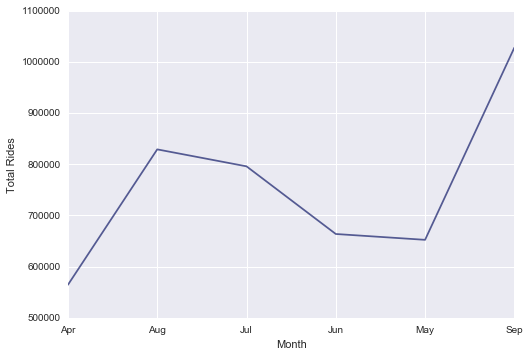

In [19]:
monthData['count'].plot(kind='line', color='#141D6A', alpha =0.7)
plt.xlabel('Month')
plt.ylabel('Total Rides')

Above graph shows that the number of uber rides came down in June & May, but picked up again in September significantly. This can be attributed to increasing number of people adopting uber.

### Analysis 2 : Line Plot for number of Uber rides for the weekday

#### Extracting the day fo the week. dt.weekday_name in available in pandas versions 0.18.1 and above

In [20]:
df2014['dayOfWeek'] = df2014['Date/Time'].dt.weekday_name

In [21]:
dayData = df2014.groupby('dayOfWeek').count()

In [22]:
dayData['count'] = dayData['Date/Time']

In [23]:
del dayData['Date/Time']
del dayData['Base']
del dayData['Lat']
del dayData['Lon']
del dayData['Month']


In [24]:
dayData


count
dayOfWeek        
Friday     741139
Monday     541472
Saturday   646114
Sunday     490180
Thursday   755145
Tuesday    663789
Wednesday  696488

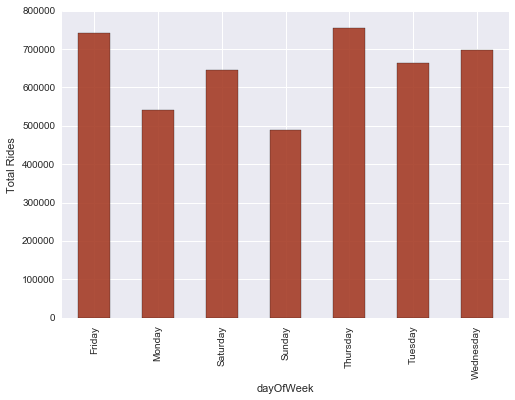

In [25]:
dayData['count'].plot(kind='bar', color='#A53C26', alpha =0.9)
plt.xlabel('dayOfWeek')
plt.ylabel('Total Rides')

Above graphs shows us that the total rides is lowest on Sunday, starts picking up pace as the week progresses with Monday receiving higher rides than Sunday, Tuesday receiving more than Monday, Wednesday more than Tuesday, Thursday more than Wednesday and slightly coming down on Friday and slightly coming down on Saturday again. Graph gradually picks up to reach peak on Thursday and comes down gradually over the rest of the week.

### Analysis 3 : Extracting the hour of uber pickup time and Plotting the ride frequency in terms of percentages of total ride hourly

In [26]:
df2014['hour'] = df2014['Date/Time'].dt.hour

In [27]:
hourData = df2014.groupby('hour').count()


In [28]:
hourData['count'] = hourData['Date/Time']

In [29]:
del hourData['Date/Time']
del hourData['Base']
del hourData['Lat']
del hourData['Lon']
del hourData['Month']
del hourData['dayOfWeek']

In [30]:
hourData['percentage'] = hourData['count']/ hourData['count'].sum()*100

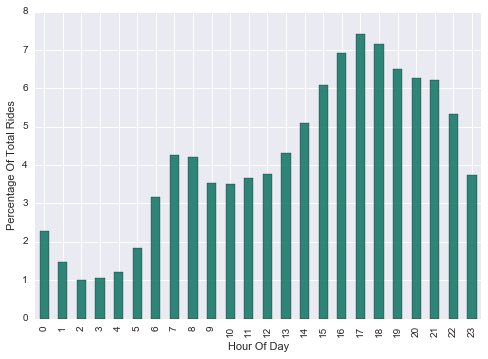

In [31]:
hourData['percentage'].plot(kind='bar', color='#18796A', alpha =0.9)
plt.xlabel('Hour Of Day')
plt.ylabel('Percentage Of Total Rides')

Above graphs shows us that as the day progress, number of rides pickup pace to reach a local maximum at 7 AM - 8AM, reducing a little bit after that and reaching the highest peak from 4PM - 6 PM  and gradually going down with the day. Uber receives almost 21.5% of the orders of the day between 4PM - 6 PM.

## Analysis 4 : Day of the week vs Time of the day - Total number of rides Scatter Plot

In [32]:
df2014.head(5)

Date/Time      Lat      Lon    Base Month dayOfWeek  hour
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512   Apr   Tuesday     0
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512   Apr   Tuesday     0
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512   Apr   Tuesday     0
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512   Apr   Tuesday     0
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512   Apr   Tuesday     0

In [33]:
df2014['weekDayNum'] = df2014['dayOfWeek'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7])

In [34]:
dfcounts = df2014.groupby(['weekDayNum', 'hour']).size().reset_index(name='Size')

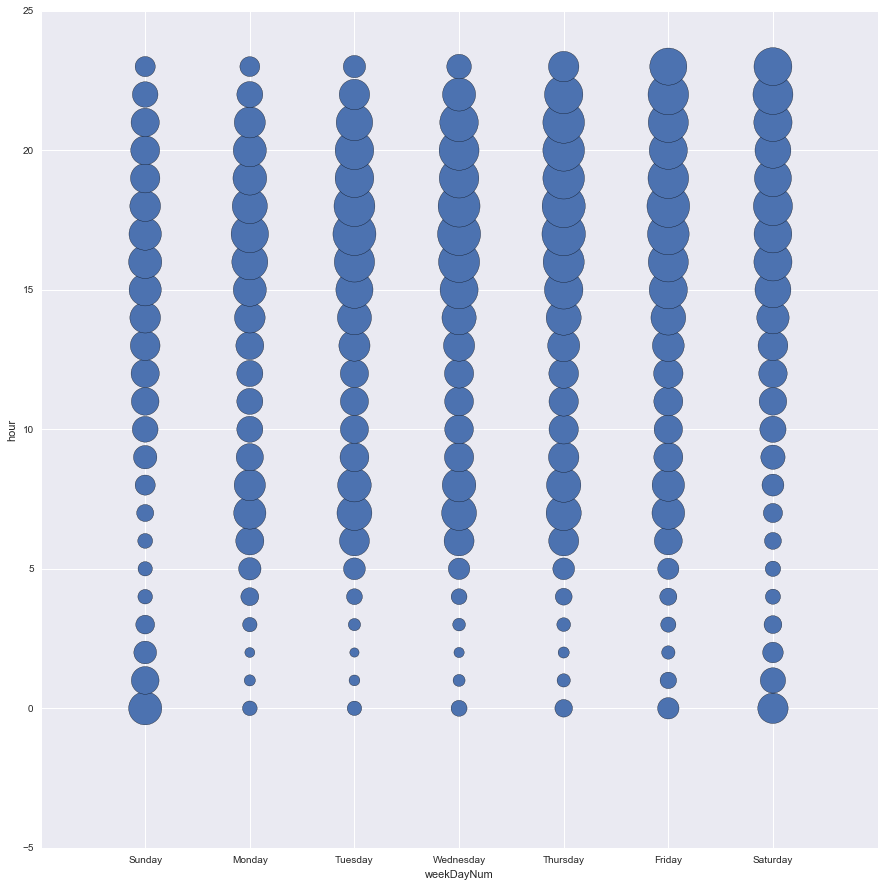

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
dfcounts.plot.scatter(ax=ax,x='weekDayNum', y='hour', s= dfcounts['Size']/30)
ax.set_xticklabels(['','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

This is the most interesting analysis. It shows the correlation between the number of uber rides compared to the hour of the day and the day of the week. It clearly matches the real world expectations. Sunday early morning orders are less compared to the early morning orders of the rest of the week. Friday & Saturday late night are busier compared to other nights, this can be attributed to people socializing and meeting other people over wine. On weekdays, people start going out from 6 am to 9 am, lesser number of rides during the day and higher rides while going back home.

## Analysis 5 : Animation showing uber pickups over NY map

Function to plot locations over the map using lat, lon from the DataFrame for a single hour (i). Generated image contains the hour on the top for reference.

In [210]:
def mapplot(df,i):
    fig = plt.figure(figsize=(15,15))
    plt.title("Hour =" + str(i) + " hrs")
    themap = Basemap(projection='lcc',
              lon_0 = -73.938212,              # lower-left corner longitude
              lat_0 = 40.679280,               # lower-left corner latitude
              resolution = 'h',
                 width = 40000,
                 height = 40000
              #area_thresh = 100000.0,
              )
    themap.shadedrelief()
    themap.drawcoastlines()
    themap.drawcountries()
    themap.fillcontinents(color = 'green', lake_color ='aqua')
    themap.drawmapboundary(fill_color='aqua')
    x, y = themap(df['Lon'].values, df['Lat'].values)
    themap.plot(x, y, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=4            # marker size
            )
    plt.show()
    fig.savefig( str(i) +'.png', dpi=fig.dpi)


In [205]:
dftemp = df2014.copy()

In [206]:
dftemp['dt'] = dftemp['Date/Time'].dt.date

In [207]:
dftemp['dt'] = dftemp['dt'].astype('str') 

Generate a dataframe (dfSingleDate) for a single date of data

In [208]:
dfSingleDate = dftemp[dftemp['dt'] == '2014-04-01']
dfSingleDate.dtypes

Date/Time     datetime64[ns]
Lat                  float64
Lon                  float64
Base                  object
Month                 object
dayOfWeek             object
hour                   int64
weekDayNum             int64
Date          datetime64[ns]
Time                  object
Min                    int64
dt                    object
dtype: object

Use mapplot function to generate a map for each hour for the given date, 2014-04-01.

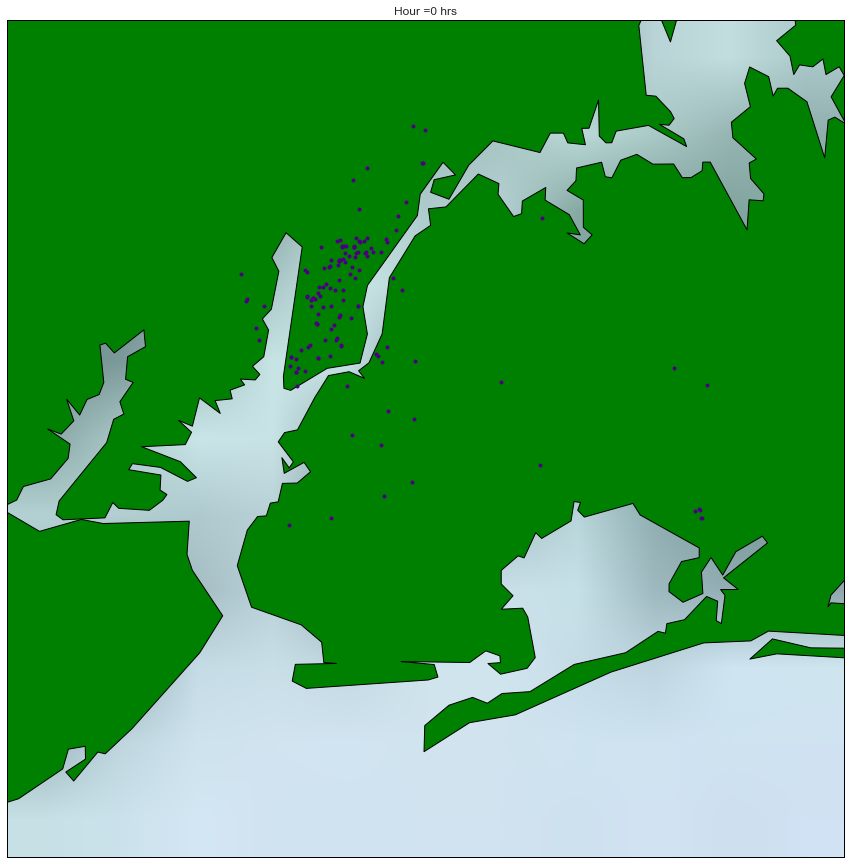

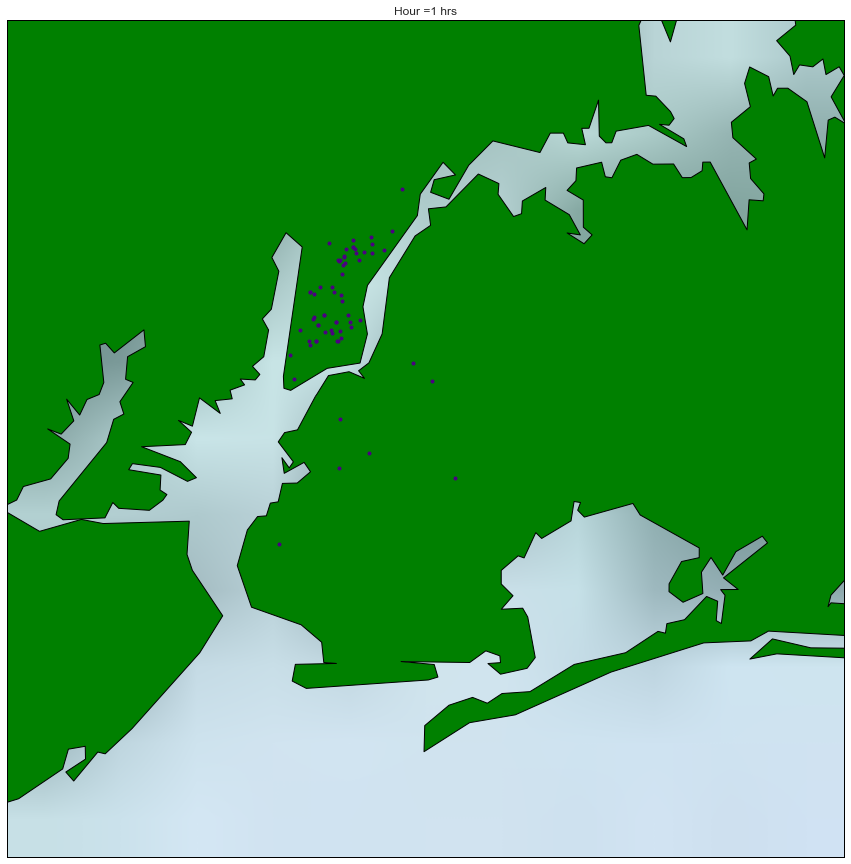

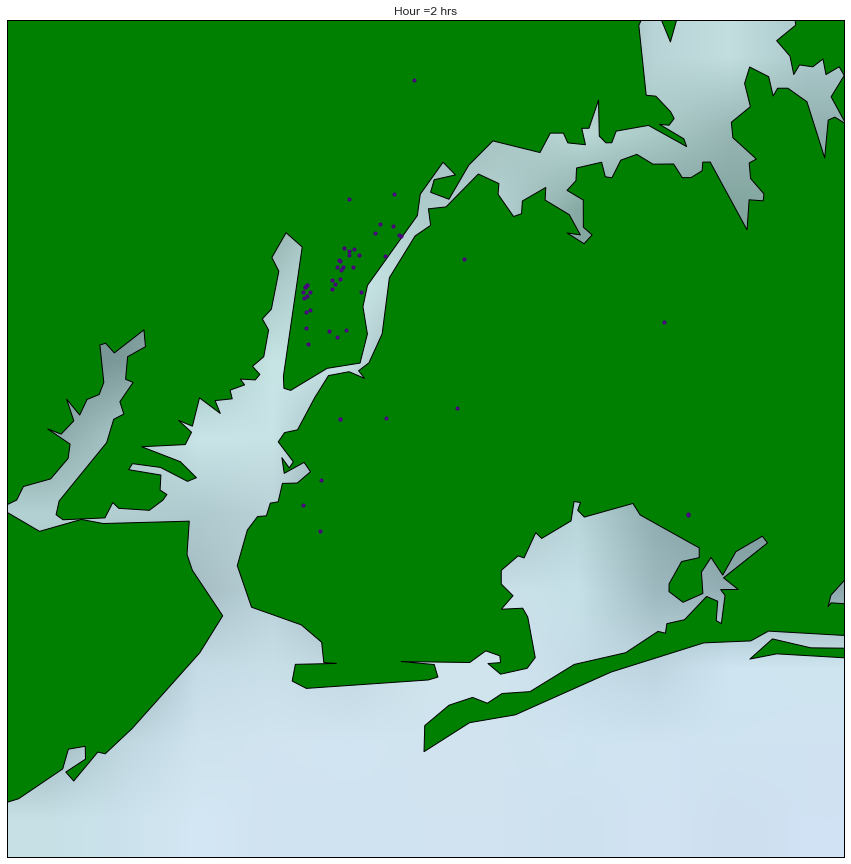

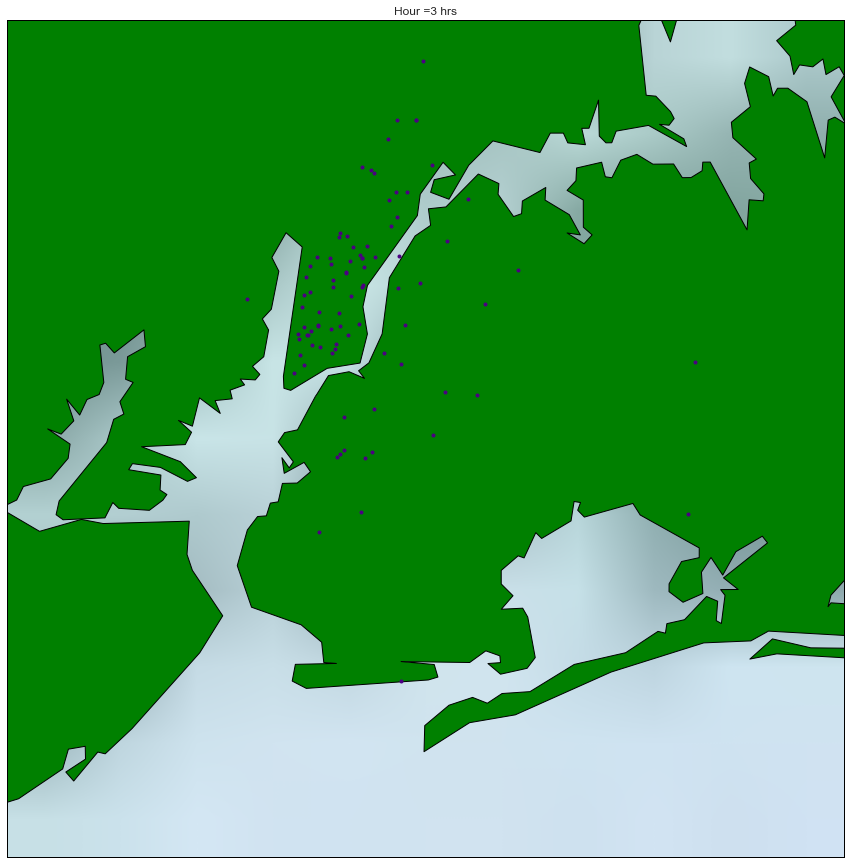

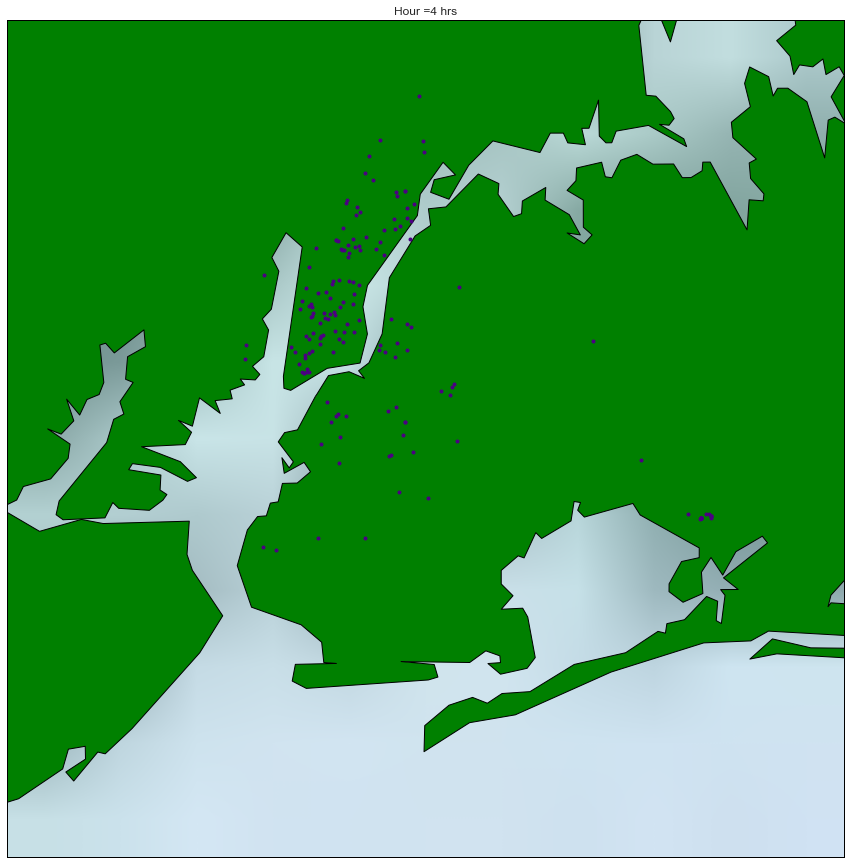

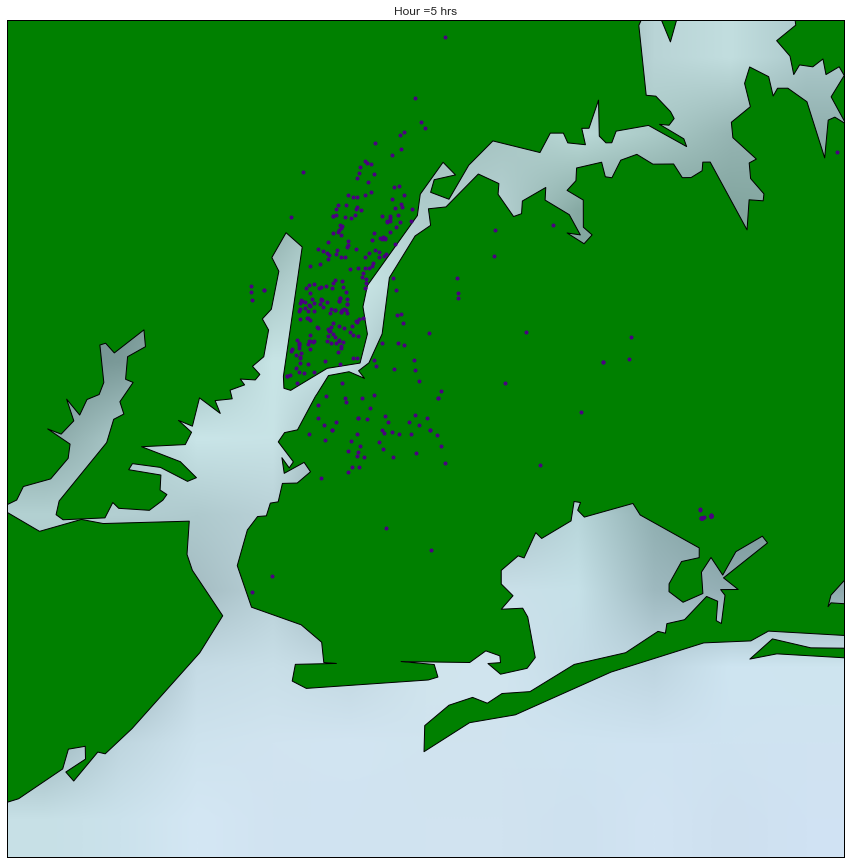

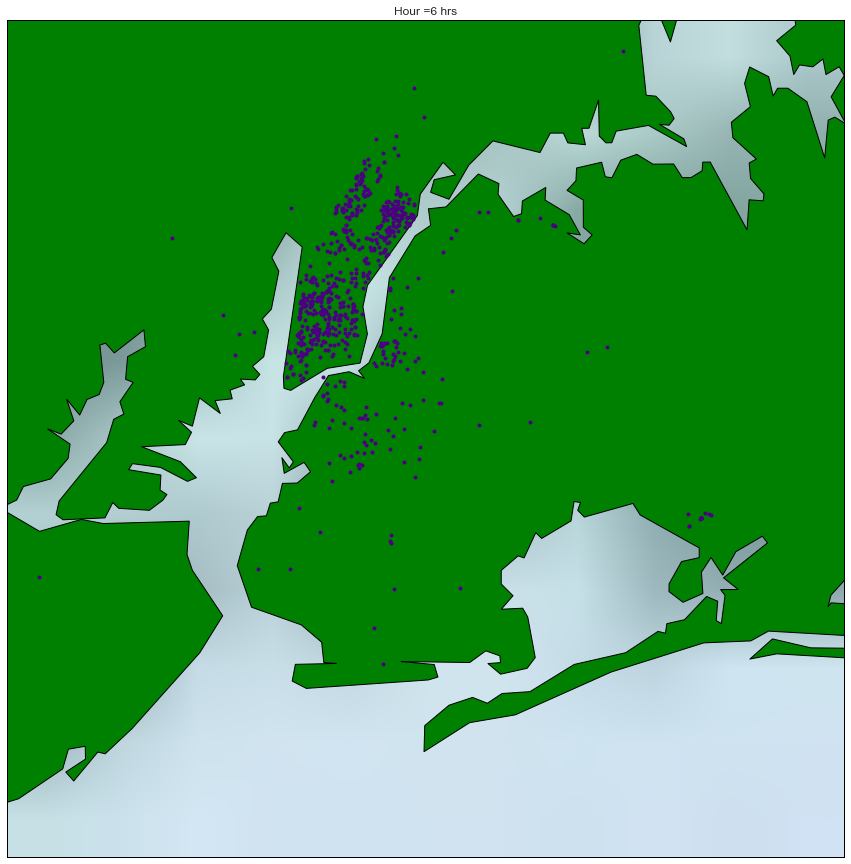

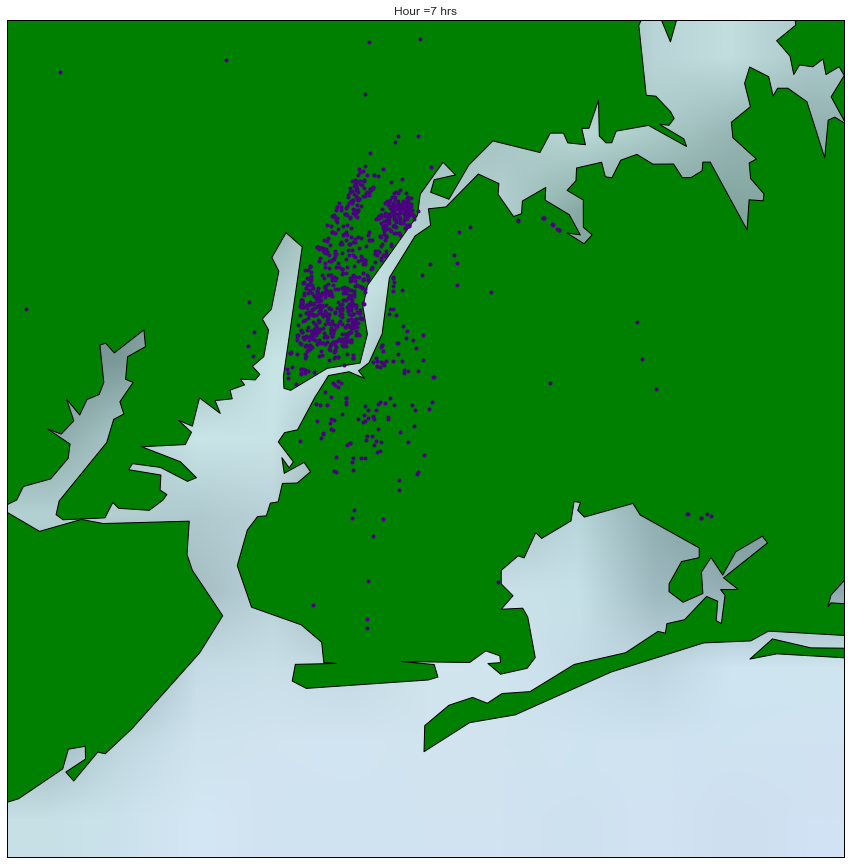

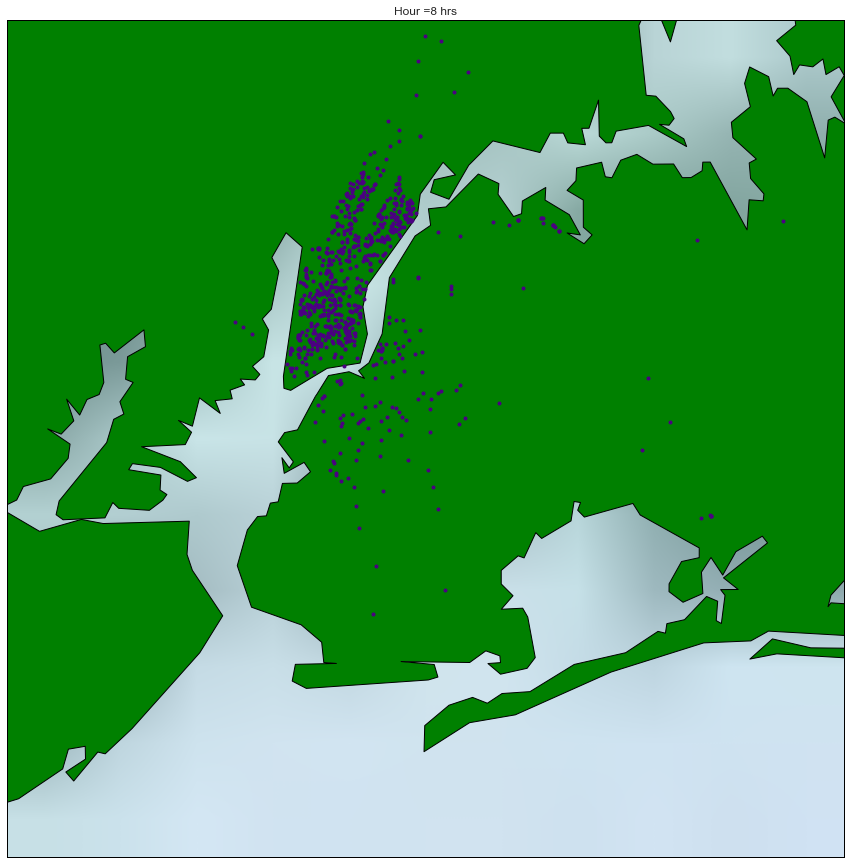

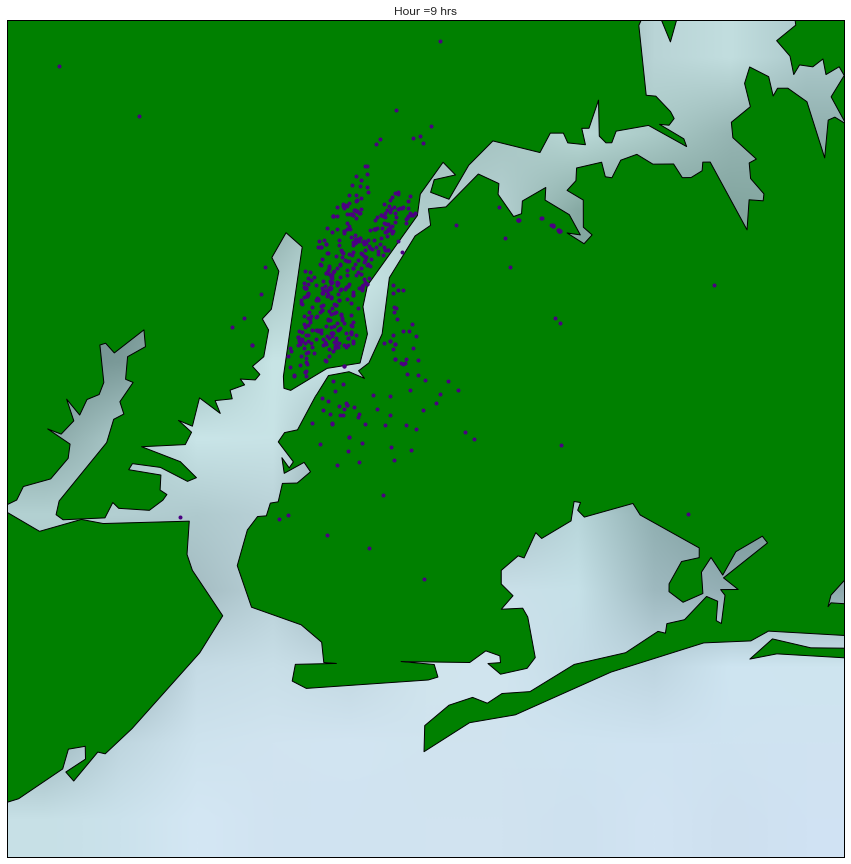

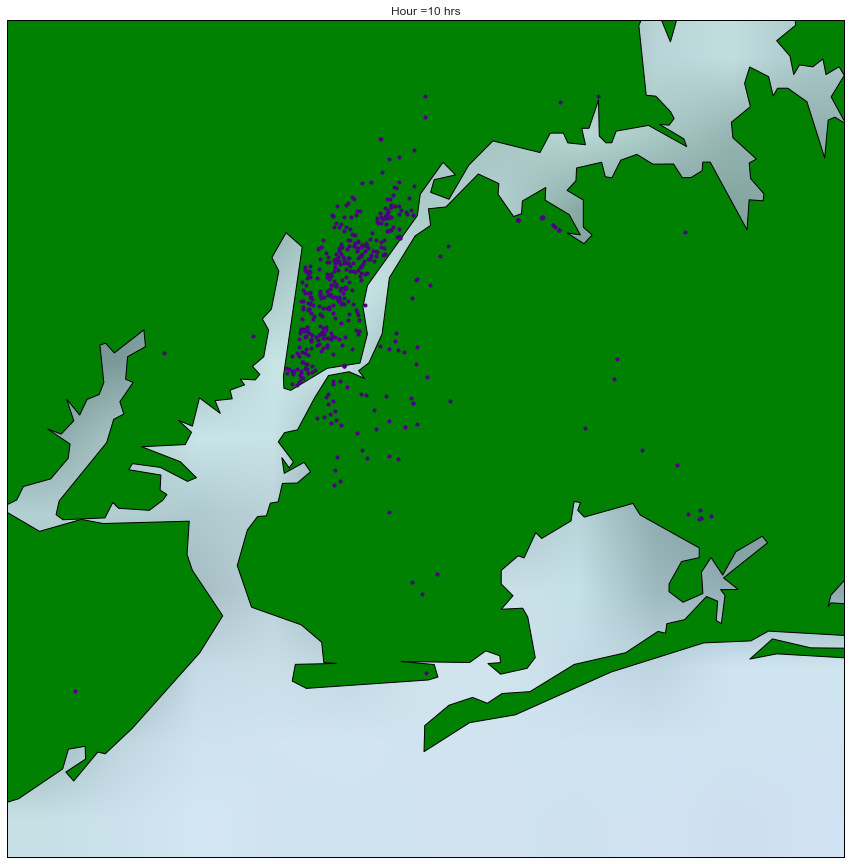

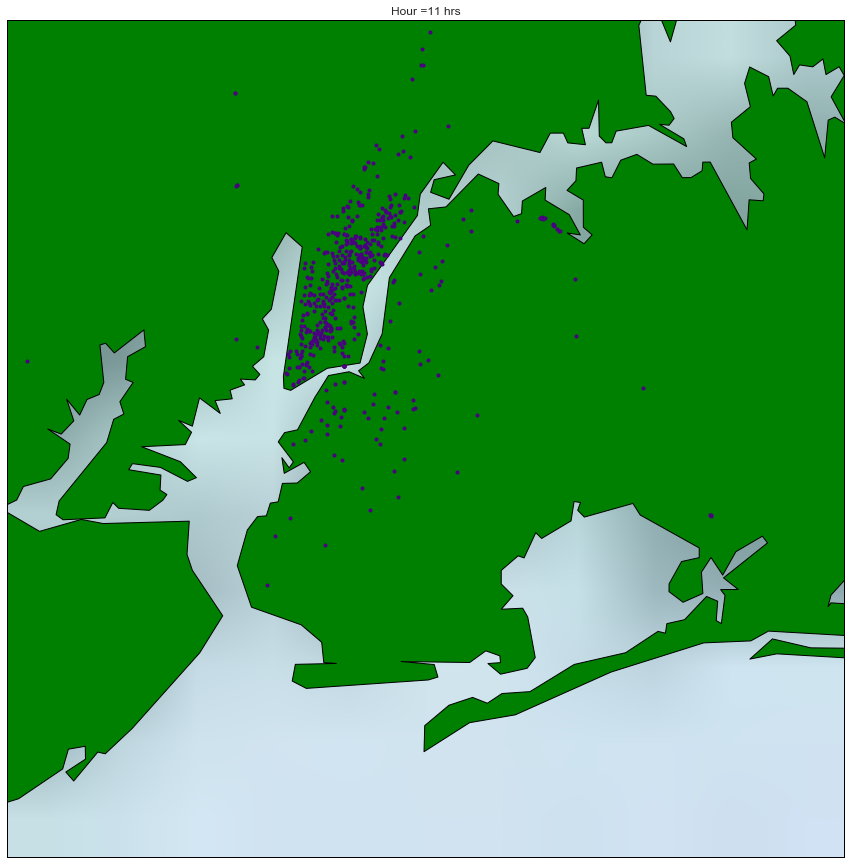

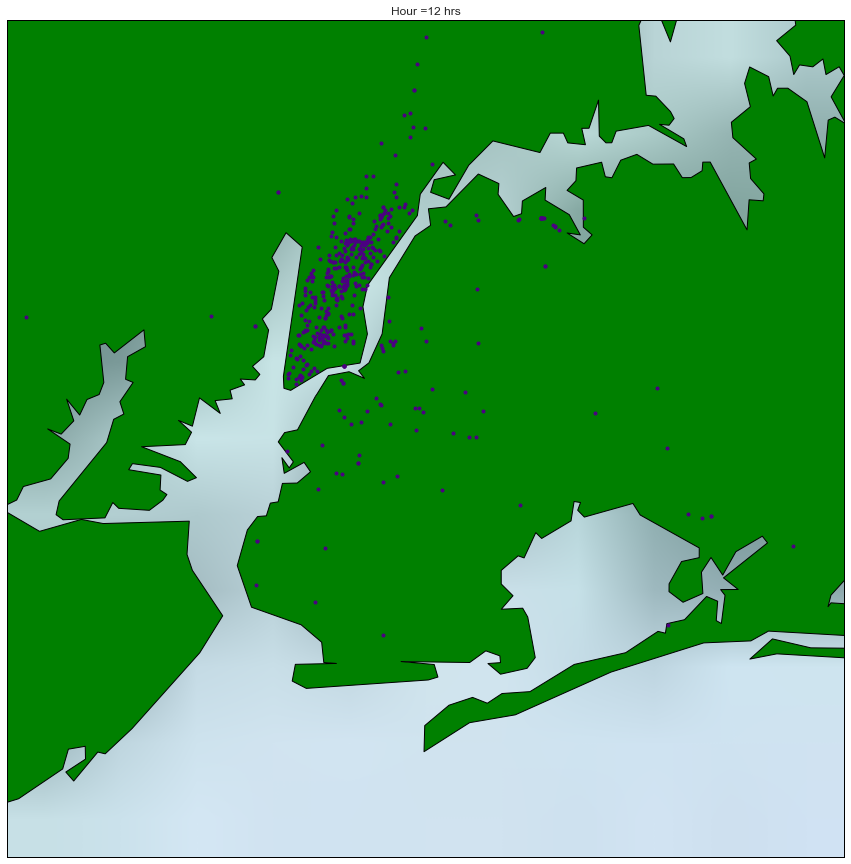

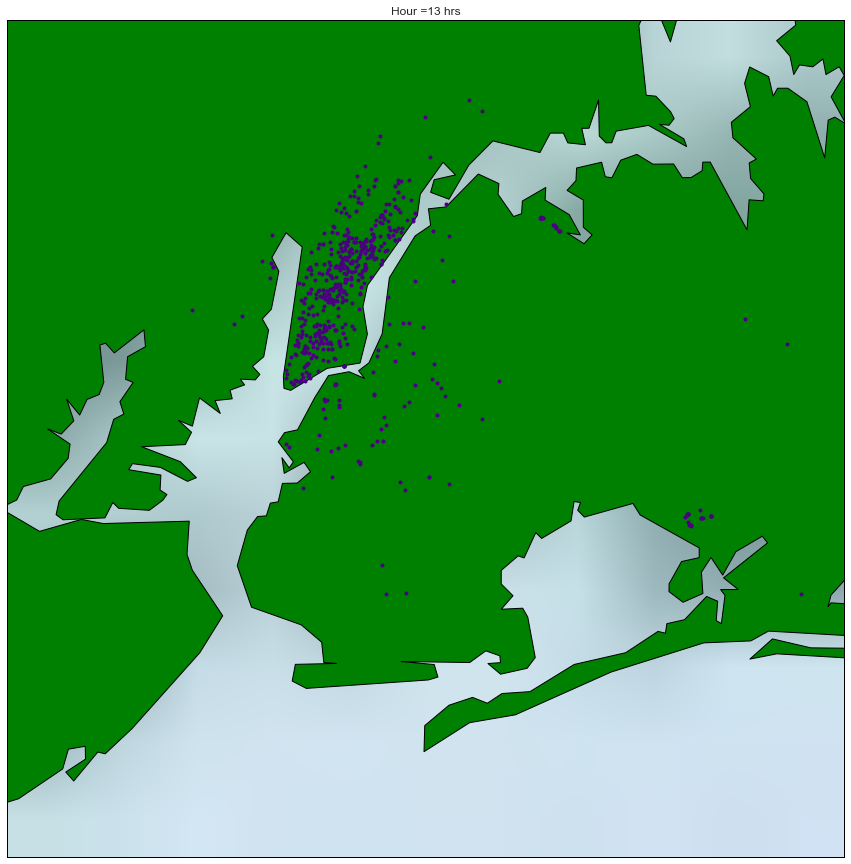

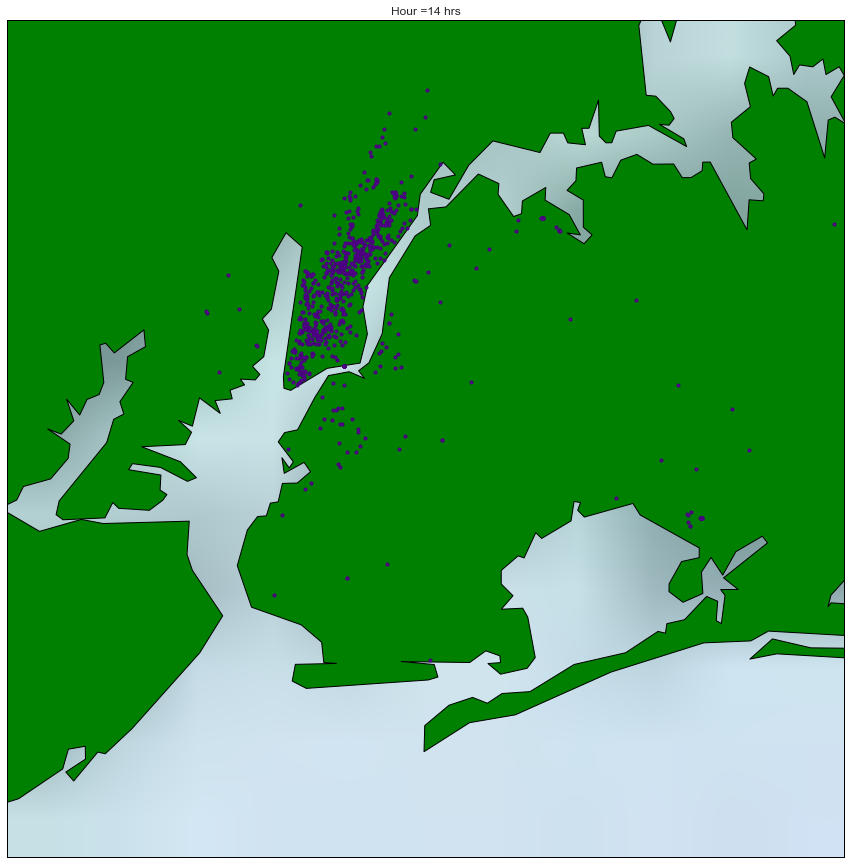

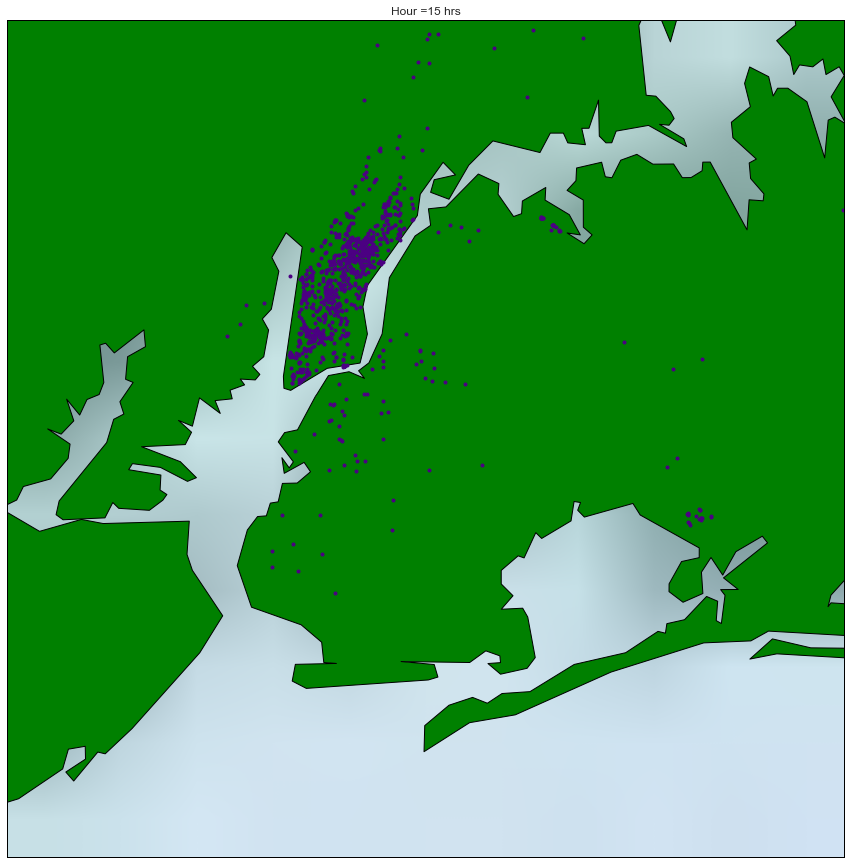

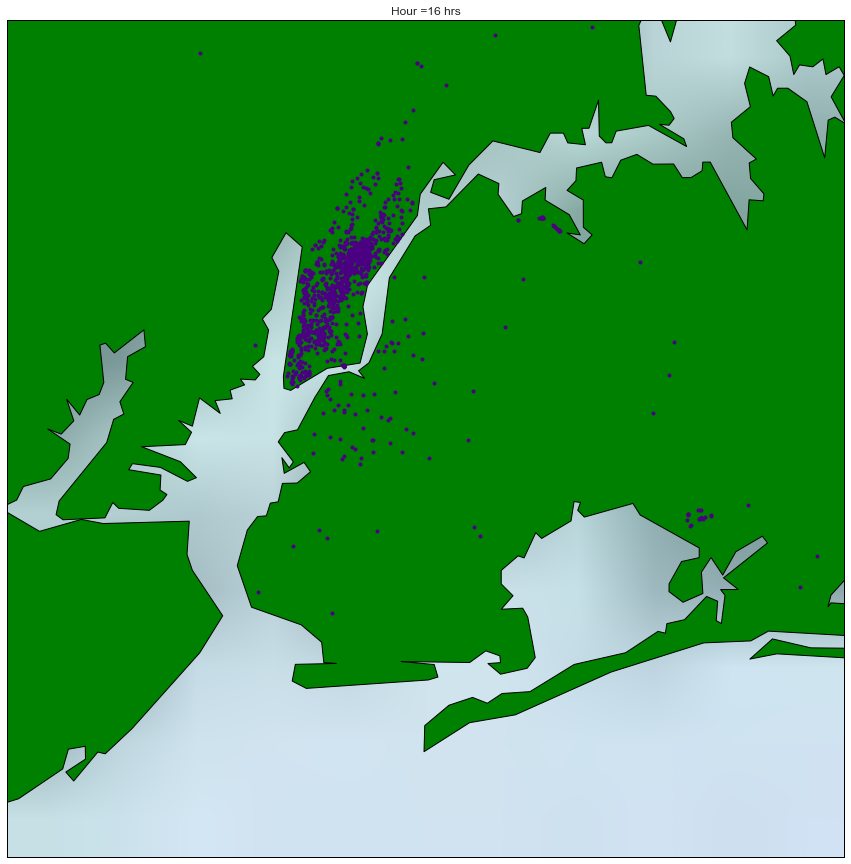

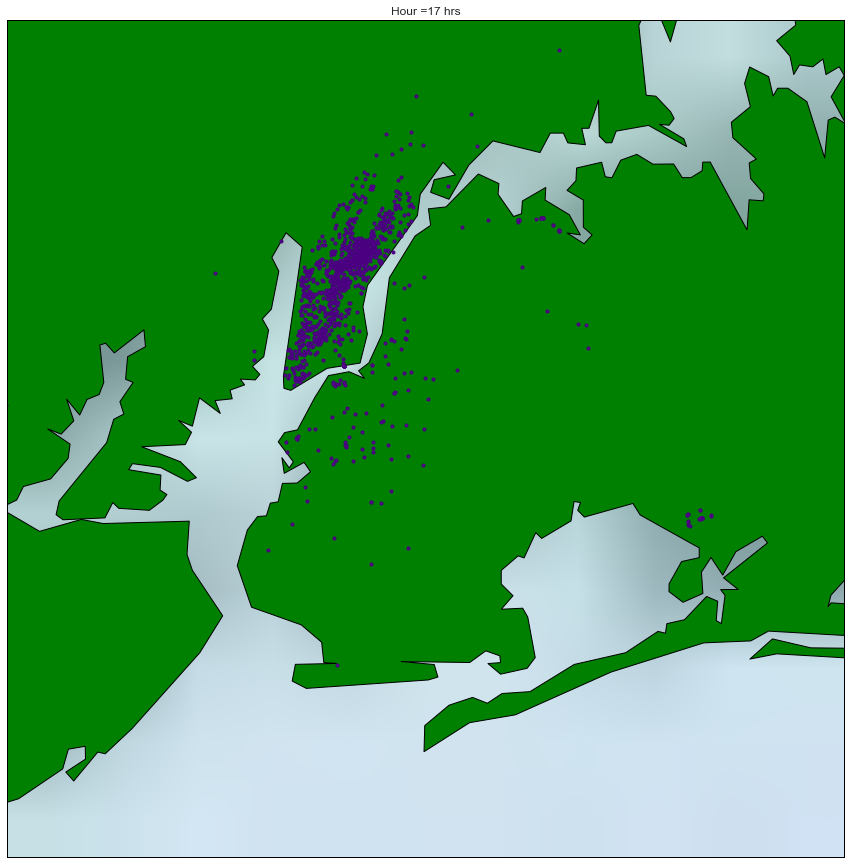

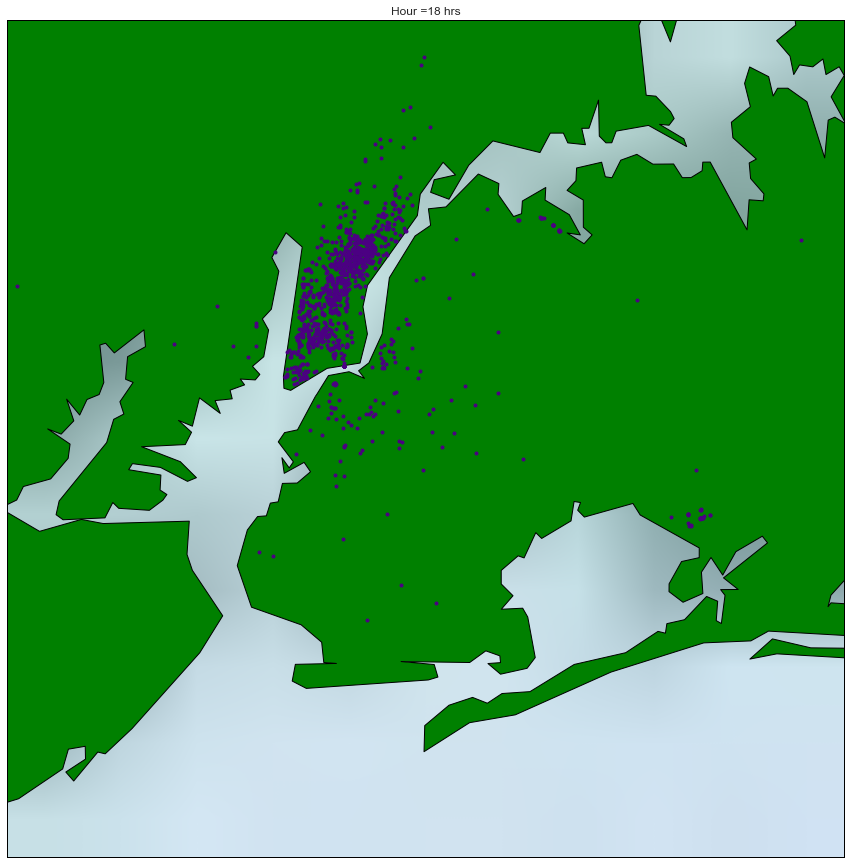

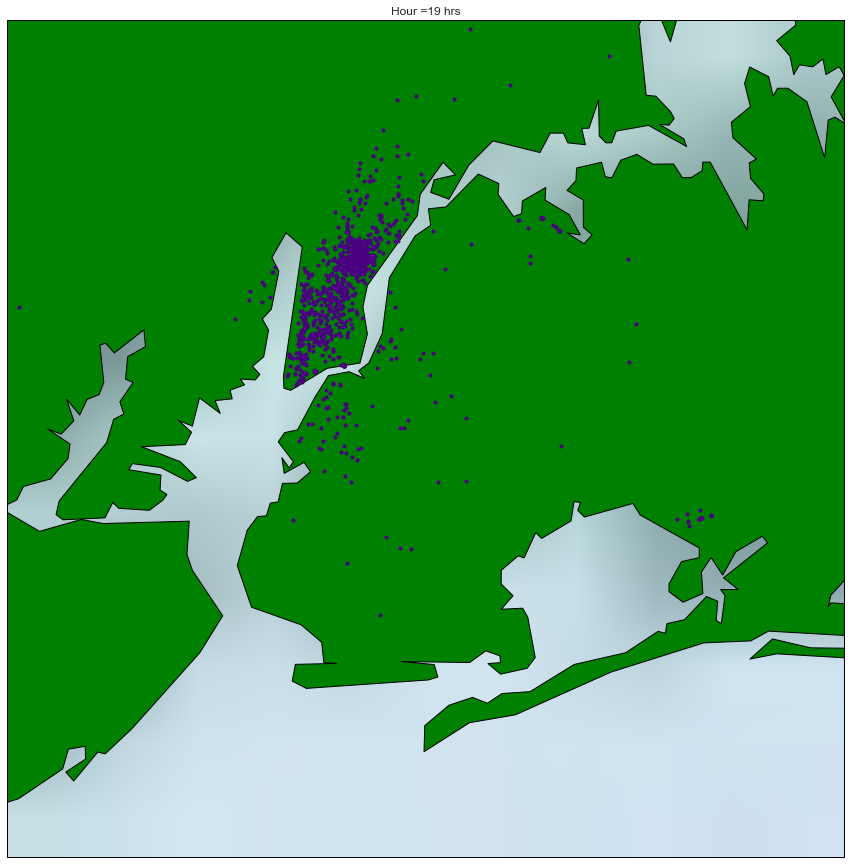

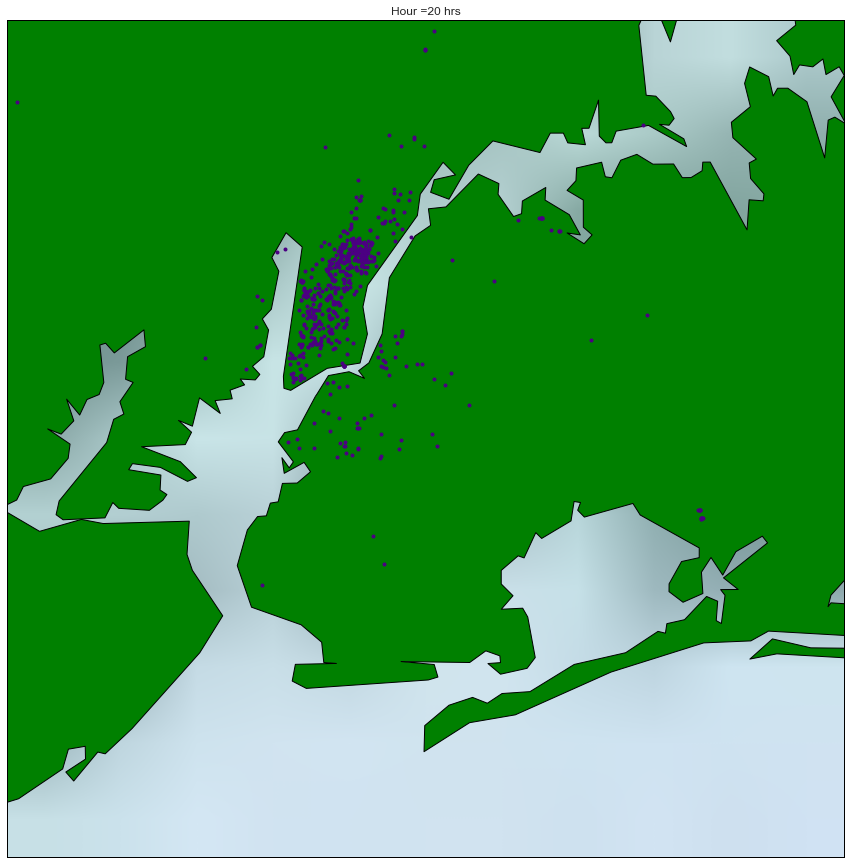

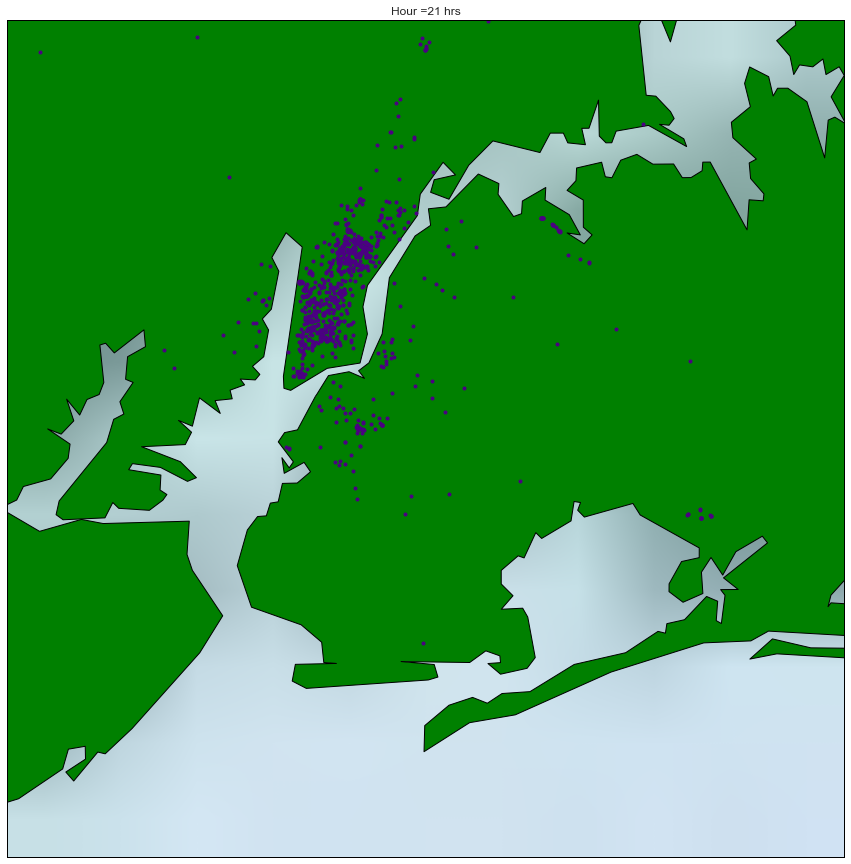

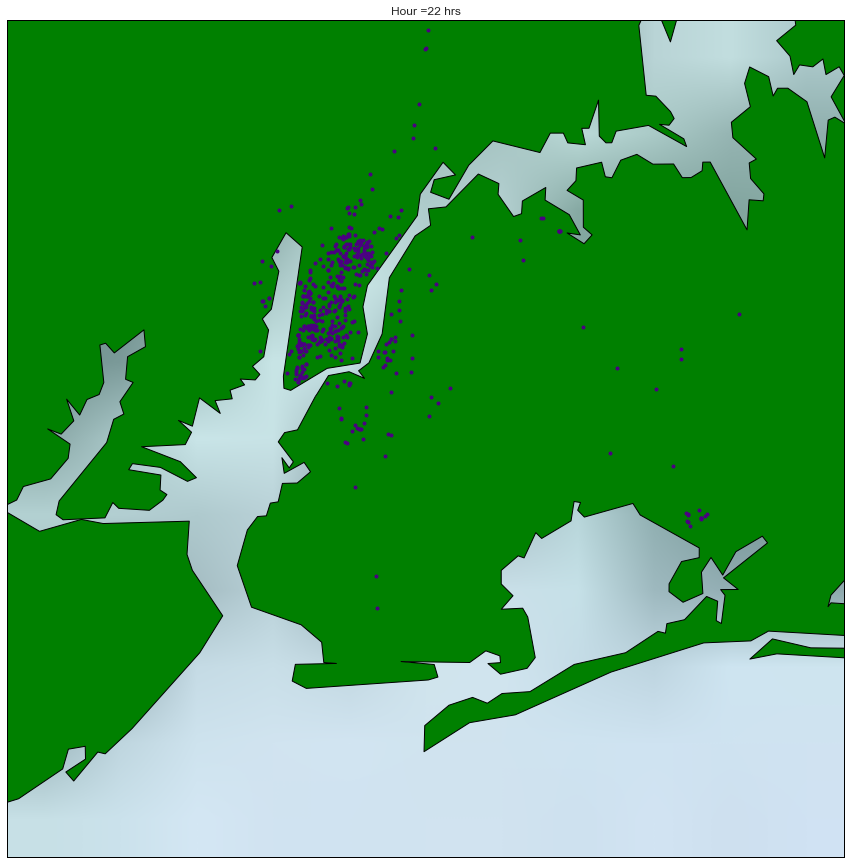

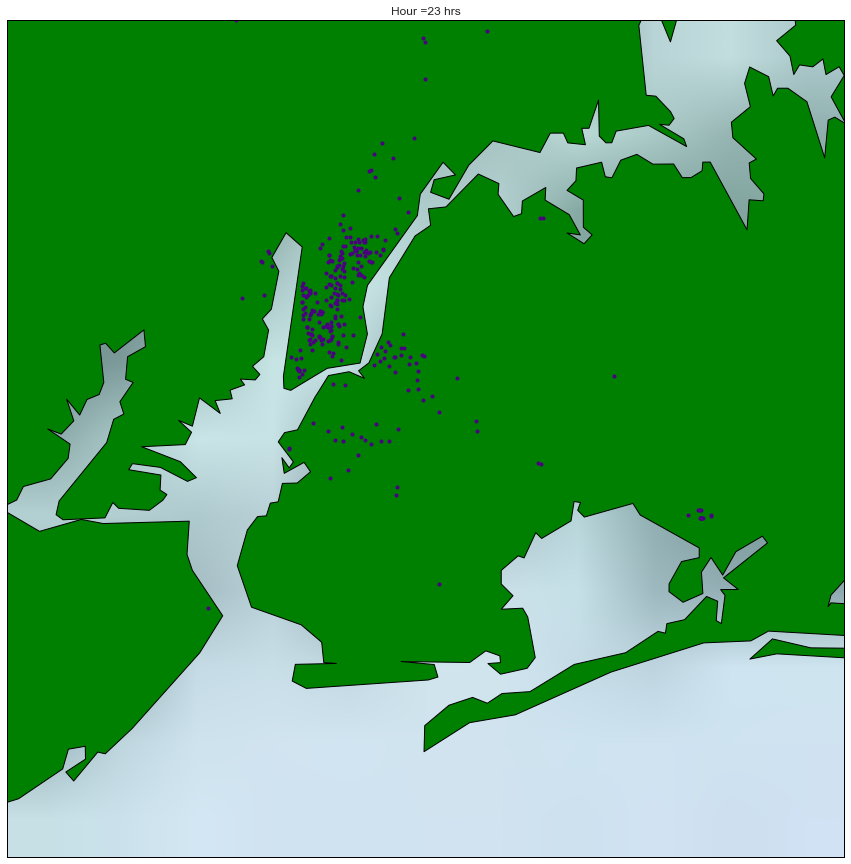

In [211]:
for i in range(24):
    df = dfSingleDate[dfSingleDate['hour'] == i]
    imageplot = mapplot(df,i)
    
    

Now that we have generated 24 different images representing each hour over a single day, I am attaching an animated gif which show all these 24 images with a time delay. Please refer to the attached file (uber_pickups_ny_map.gif) to view the animation. Please use a browser to view the gif.

## Analysis 6 : Does pooling make sense for Uber ?

To analyze the problem statement, I am taking a single date and calculating the nearest neighbors for every location. I've defined the nearest neighbor as any pickup within 3 kms radius within the +/- 1 min of the pickup time. Since I do not have any destination latitudes and longitudes I assuming around 30% of nearest neighbors travel in the same direction. 

In [44]:
df2014['Date'] = pd.to_datetime(df2014['Date/Time'].dt.strftime('%Y-%m-%d'))

In [46]:
df2014.head(10)

Date/Time      Lat      Lon    Base Month dayOfWeek  hour  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512   Apr   Tuesday     0   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512   Apr   Tuesday     0   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512   Apr   Tuesday     0   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512   Apr   Tuesday     0   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512   Apr   Tuesday     0   
5 2014-04-01 00:33:00  40.7383 -74.0403  B02512   Apr   Tuesday     0   
6 2014-04-01 00:39:00  40.7223 -73.9887  B02512   Apr   Tuesday     0   
7 2014-04-01 00:45:00  40.7620 -73.9790  B02512   Apr   Tuesday     0   
8 2014-04-01 00:55:00  40.7524 -73.9960  B02512   Apr   Tuesday     0   
9 2014-04-01 01:01:00  40.7575 -73.9846  B02512   Apr   Tuesday     1   

   weekDayNum       Date  
0           3 2014-04-01  
1           3 2014-04-01  
2           3 2014-04-01  
3           3 2014-04-01  
4           3 2014-04-01  
5           3 2014-04-01  
6           3 2014-04-01  
7           3 2014-04-01  
8           3 2014-04-01  
9           3 2014-04-01

In [47]:
df2014['Time'] = df2014['Date/Time'].dt.time

In [49]:
df2014['Min'] = df2014['Date/Time'].dt.minute

In [50]:
df2014.dtypes

Date/Time     datetime64[ns]
Lat                  float64
Lon                  float64
Base                  object
Month                 object
dayOfWeek             object
hour                   int64
weekDayNum             int64
Date          datetime64[ns]
Time                  object
Min                    int64
dtype: object

mergeDataFrame function filters the df into a df containing a single date data (i.e.2014-06-01 ). Later it self joins the dataframe on the hour (the hour part of the pick up time). I am Self joining as I need to find the distance between the locations and having the locations in the same row of a dataframe is efficient. 

In [121]:
from geopy.distance import great_circle
def mergeDataFrame(date,df):
    dfSingleDate = df[df['Date'] == date]
    del dfSingleDate['Base']
    del dfSingleDate['Month']
    del dfSingleDate['dayOfWeek']
    del dfSingleDate['weekDayNum']
    del dfSingleDate['Date']
    df1 = dfSingleDate
    df2 = dfSingleDate
    result = pd.merge(df1, df2, on='hour')
    return result

In [122]:
dfMerge = mergeDataFrame('2014-06-01',df2014)

In [133]:
dfMerge.head(10)

Date/Time_x    Lat_x   Lon_x  hour    Time_x  Min_x         Date/Time_y  \
0  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
1  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:01:00   
2  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:04:00   
3  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:04:00   
4  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:07:00   
5  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:08:00   
6  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:08:00   
7  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:08:00   
8  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:09:00   
9  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:10:00   

     Lat_y    Lon_y    Time_y  Min_y  timeDiff  
0  40.7293 -73.9920  00:00:00      0         0  
1  40.7131 -74.0097  00:01:00      1         1  
2  40.3461 -74.6610  00:04:00      4         4  
3  40.7555 -73.9833  00:04:00      4         4  
4  40.6880 -74.1831  00:07:00      7         7  
5  40.7152 -73.9917  00:08:00      8         8  
6  40.7282 -73.9910  00:08:00      8         8  
7  40.3042 -73.9794  00:08:00      8         8  
8  40.7270 -73.9915  00:09:00      9         9  
9  40.7221 -73.9965  00:10:00     10        10

Calculating the timeDiff between the two locations and filtering all which have more than 2 mins of difference in pickup time. 

In [124]:
dfMerge['timeDiff'] = abs(dfMerge['Min_x'] - dfMerge['Min_y'])

In [125]:
dfNeighbours = dfMerge[dfMerge['timeDiff'] <= 2]

In [126]:
len(dfNeighbours)

1096579

Calculating the distance between locations in kms using great_circle funtion

In [134]:
dfNeighbours['distance'] = dfNeighbours.apply(lambda row: great_circle((row['Lat_x'], row['Lon_x']), (row['Lat_y'], row['Lon_y'])),axis=1)

/Users/shraavyasirpa/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
dfNeighbours.head(10)

Date/Time_x    Lat_x   Lon_x  hour    Time_x  Min_x         Date/Time_y  \
0   2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
1   2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:01:00   
39  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
40  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
41  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
42  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
43  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
44  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
45  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
46  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   

      Lat_y    Lon_y    Time_y  Min_y  timeDiff           distance  
0   40.7293 -73.9920  00:00:00      0         0             0.0 km  
1   40.7131 -74.0097  00:01:00      1         1   2.33944098944 km  
39  40.7449 -73.9782  00:00:00      0         0   2.08885399203 km  
40  40.7305 -74.0618  00:00:00      0         0   5.88471706313 km  
41  40.7355 -73.9981  00:00:00      0         0  0.860163037447 km  
42  40.7651 -73.9673  00:00:00      0         0   4.49304921283 km  
43  40.7229 -73.9890  00:00:00      0         0  0.755429001345 km  
44  40.7421 -73.9986  00:00:00      0         0   1.52850145751 km  
45  40.7617 -73.9906  00:00:00      0         0   3.60566117539 km  
46  40.7350 -74.0004  00:00:00      0         0  0.950359561717 km

In [136]:
dfNearestNeighbour = dfNeighbours[dfNeighbours['distance'] <= 3]

In [137]:
len(dfNearestNeighbour)

297881

In [138]:
dfNearestNeighbour.head(100)

Date/Time_x    Lat_x    Lon_x  hour    Time_x  Min_x  \
0    2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
1    2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
39   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
41   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
43   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
44   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
46   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
47   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
48   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
49   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
50   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
53   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
54   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
56   2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
462  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
463  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
464  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
465  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
466  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
469  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
473  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
476  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
752  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
754  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
755  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
757  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
758  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
760  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
761  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
762  2014-06-01 00:00:00  40.7293 -73.9920     0  00:00:00      0   
...                  ...      ...      ...   ...       ...    ...   
1882 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
1883 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
1884 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
1890 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
1891 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
1892 2014-06-01 00:01:00  40.7131 -74.0097     0  00:01:00      1   
2226 2014-06-01 00:04:00  40.3461 -74.6610     0  00:04:00      4   
3339 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3392 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3394 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3395 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3397 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3402 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3405 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3408 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3413 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3417 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3420 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3421 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3423 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3428 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3430 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3815 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3818 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3821 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3828 2014-06-01 00:04:00  40.7555 -73.9833     0  00:04:00      4   
3830 2014-0

Creating a new columns which a combination of the latitude and longitude. This can be used as the key for groupby in further analysis

In [139]:
dfNearestNeighbour["location"] = dfNearestNeighbour["Lat_x"].map(str) + dfNearestNeighbour["Lon_x"].map(str)


/Users/shraavyasirpa/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [140]:
dfNearestNeighbour.head(10)

Date/Time_x    Lat_x   Lon_x  hour    Time_x  Min_x         Date/Time_y  \
0   2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
1   2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:01:00   
39  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
41  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
43  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
44  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
46  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
47  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:00:00   
48  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:01:00   
49  2014-06-01  40.7293 -73.992     0  00:00:00      0 2014-06-01 00:01:00   

      Lat_y    Lon_y    Time_y  Min_y  timeDiff           distance  \
0   40.7293 -73.9920  00:00:00      0         0             0.0 km   
1   40.7131 -74.0097  00:01:00      1         1   2.33944098944 km   
39  40.7449 -73.9782  00:00:00      0         0   2.08885399203 km   
41  40.7355 -73.9981  00:00:00      0         0  0.860163037447 km   
43  40.7229 -73.9890  00:00:00      0         0  0.755429001345 km   
44  40.7421 -73.9986  00:00:00      0         0   1.52850145751 km   
46  40.7350 -74.0004  00:00:00      0         0  0.950359561717 km   
47  40.7268 -73.9772  00:00:00      0         0   1.27809118653 km   
48  40.7372 -73.9963  00:01:00      1         1  0.950492252509 km   
49  40.7233 -74.0086  00:01:00      1         1    1.5502318858 km   

          location  
0   40.7293-73.992  
1   40.7293-73.992  
39  40.7293-73.992  
41  40.7293-73.992  
43  40.7293-73.992  
44  40.7293-73.992  
46  40.7293-73.992  
47  40.7293-73.992  
48  40.7293-73.992  
49  40.7293-73.992

Calculating number of neighbours for each booking and calling it a pool size. Assuming only 30% of the pickup are in the same direction and can be pooled, I am discounting the Pool Size to 30% of hte original Pool Size.

In [216]:
nearestNeighbourCount = dfNearestNeighbour.groupby(['location','Date/Time_x']).size().reset_index(name='Pool Size')
nearestNeighbourCount['Pool Size'] = nearestNeighbourCount['Pool Size']*0.3


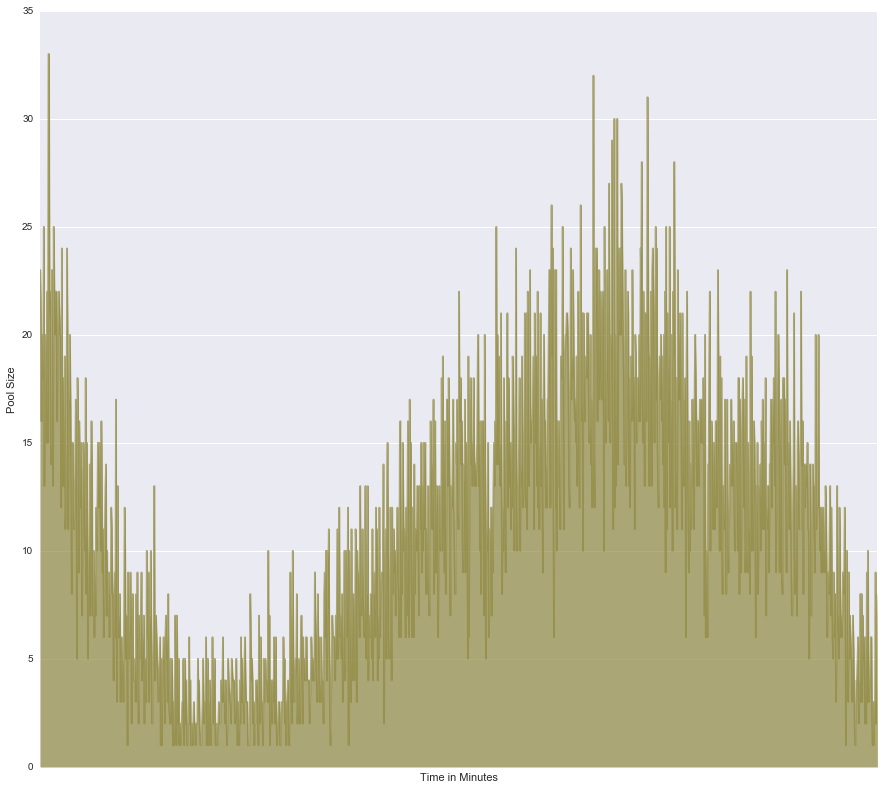

In [230]:
df = nearestNeighbourCount.groupby(['Date/Time_x']).count()
fig = plt.figure(figsize=(15,15))
df['Pool Size'].plot(ax=fig.gca(),kind='area', color='#918a42', alpha =0.7)
plt.xlabel('Time in Minutes')
plt.xticks([])
plt.ylabel('Pool Size')

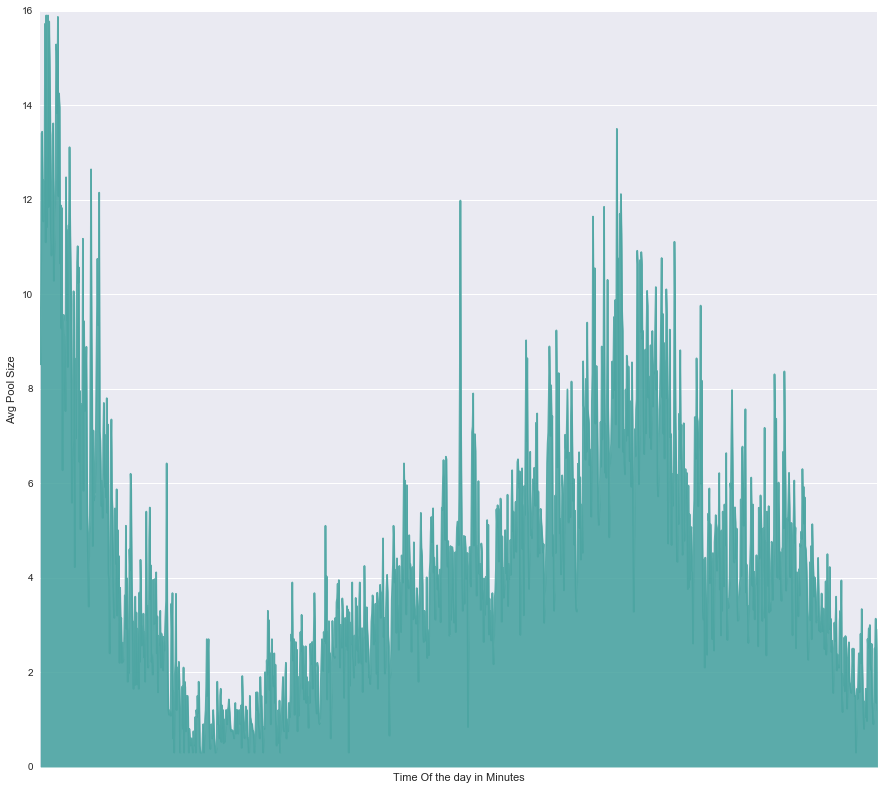

In [226]:
df = nearestNeighbourCount.groupby(['Date/Time_x']).mean()
fig = plt.figure(figsize=(15,15))
df['Pool Size'].plot(ax=fig.gca(),kind='area', color='#4ca5a2', alpha =0.9)
plt.xlabel('Time Of the day in Minutes')
plt.xticks([])
plt.ylabel('Avg Pool Size')

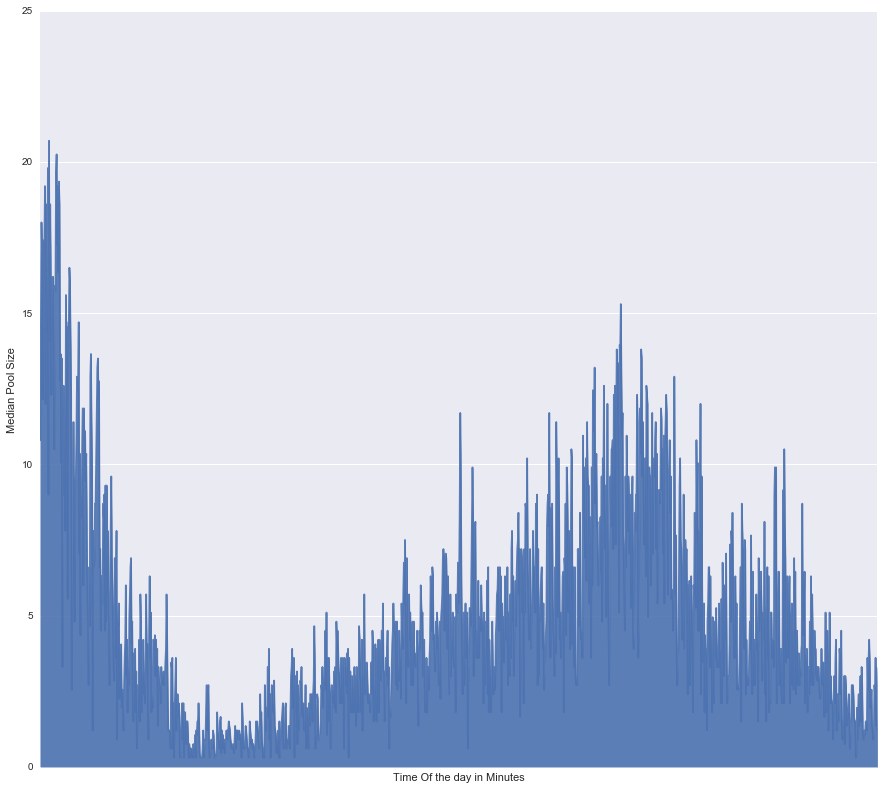

In [225]:
df = nearestNeighbourCount.groupby(['Date/Time_x']).median()
fig = plt.figure(figsize=(15,15))
df['Pool Size'].plot(ax=fig.gca(),kind='area', alpha =0.9)
plt.xlabel('Time Of the day in Minutes')
plt.xticks([])
plt.ylabel('Median Pool Size')

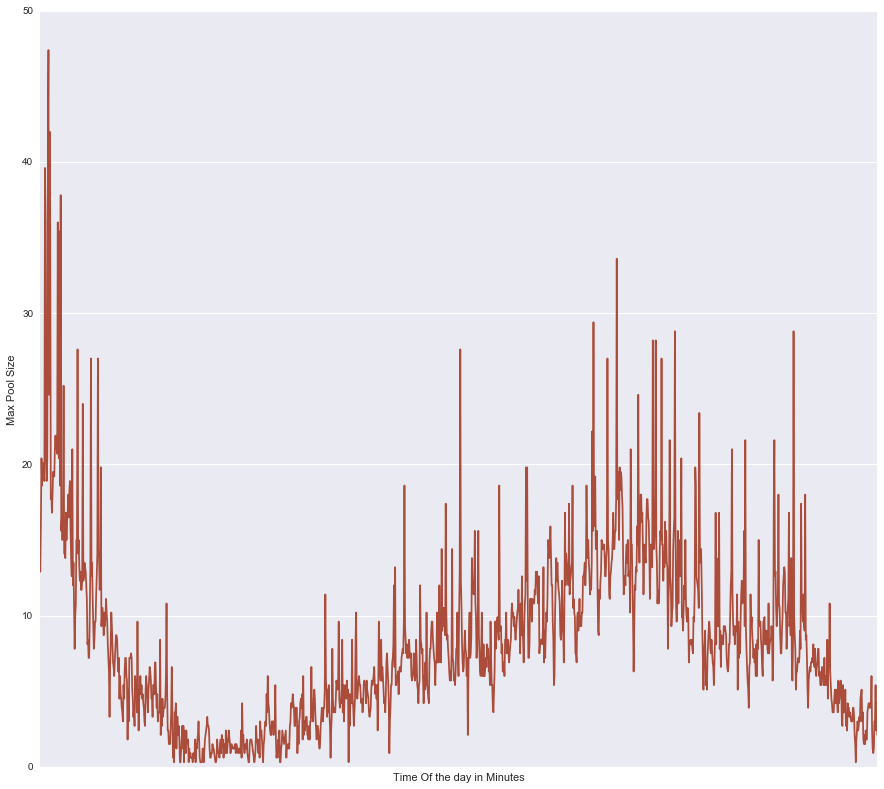

In [224]:
df = nearestNeighbourCount.groupby(['Date/Time_x']).max()
fig = plt.figure(figsize=(15,15))
df['Pool Size'].plot(ax=fig.gca(),color = '#A53C26', kind='line', alpha =0.9)
plt.xlabel('Time Of the day in Minutes')
plt.xticks([])
plt.ylabel('Max Pool Size')

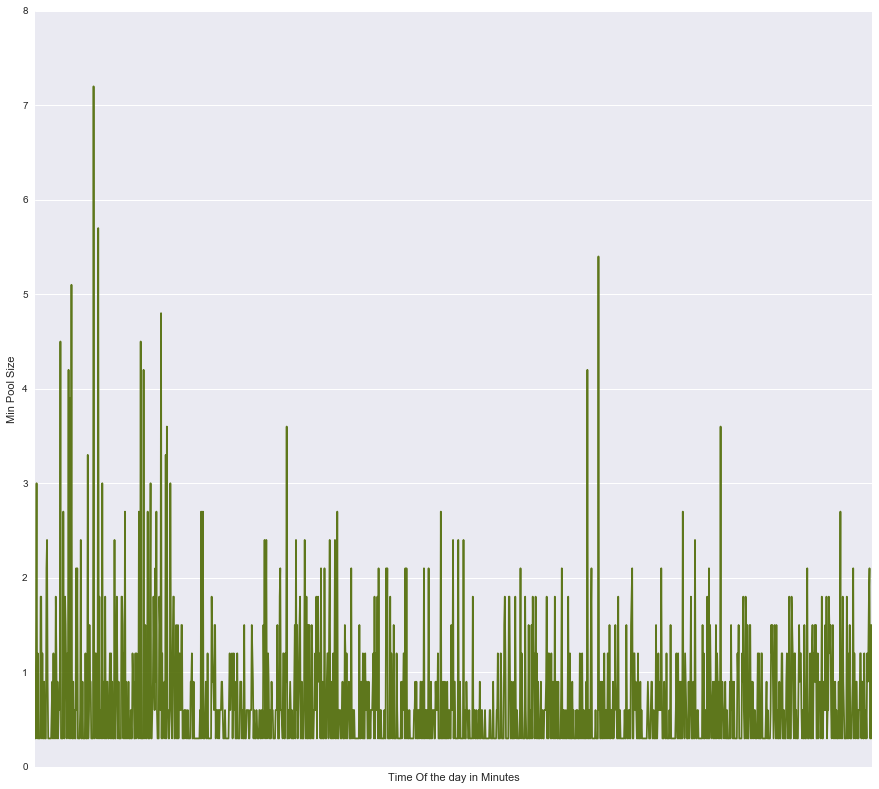

In [223]:
df = nearestNeighbourCount.groupby(['Date/Time_x']).min()
fig = plt.figure(figsize=(15,15))
df['Pool Size'].plot(ax=fig.gca(),kind='line', color='#4f6b04', alpha =0.9)
plt.xlabel('Time Of the day in Minutes')
plt.xticks([])
plt.ylabel('Min Pool Size')

From the above set of graphs for the counts, average, min, max, medain of the neares neighbours we can observe that there are larger number of poolable neighbours than no pools. So we can conclude that Uber Pool is a good strategy and could be well adopted. 

## Conclusions

1. We can clearly see that as time progressed from April to September the popularity of uber has increased gradually. This could be attributed to the ease of use of booking a ride through uber app and the younger generation using phones.
2. Uber can send an alert to drivers to be in a certain location at a certain time in a week to cater to the increase in demand. The surge pricing in Uber can be attributed to the demand in certain timings. 
2. Uber Pool can be encouraged by incentivising the drivers and customers alike thereby creating savings to all parties invloved i.e. Uber, Drivers & Customers and also saving precious environment in the process by reducing the burning of fossil fuels.
